# TP1: Régression Linéaire simple
 

La régression linéaire simple est un algorithme prédictif supervisé. Il prend en entrée une variable prédictive x et va essayer de trouver une fonction de prédiction  $h_\theta(x)$ étant une droite, elle s’écrira mathématiquement sous la forme :
$$ h_\theta(x)=\theta_0+\theta_1 x$$
 Avec $ \theta_0$ et $ \theta_1$ sont les coefficients de la droite.

Le but  revient à trouver un couple $(\theta_0,\theta_1)$ optimal tel que $h_\theta(x)$ soit le plus proche possible de $y$ (la valeur qu’on essaie de prédire). Et ce, pour tous les couples $(x,y)$ qui forment notre ensemble de données d’apprentissage $ \{ (x_{i},y_{i}) \in R^{2}, i=1...n \}$.
 La fonction $h_\theta$ va essayer de transformer au mieux  $x_i$ en $y_i$ tel que  $$ h_\theta(x_i)\approx y_i  \forall i \in \{1 ... n\}$$
 <img src="1.png" style="with:100px;height:200px"/>

## A- Methode1:Moindres carrés

Dans le cas d'une régression lineaire simple nous avons la solution directe suivante:
$$\theta_{1}=\frac{\sum_{i=0}^{m}x_{i}y_{i}-m\overline{x}\overline{y}}{\sum_{i=0}^{m}x_{i}^2-m\overline{x}^2} $$

$$\theta_{0}=\overline{y}-\theta_{1}\overline{x}$$

Où $\overline{x}$ est la moyenne des éléments de x et $\overline{y}$ est la moyenne des éléments de y

## Question1
-L'étude d'un marché présente des quantités offertes (X) et des prix d'achat (Y) (en dhs)  a donné les résultats suivants;	
 <img src="2.png" style="with:30px;height:60px"/>
 a-En utilisant numpy afficher X et Y

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([2,4,14,8,12])
Y = np.array([10,8,2,6,4])
print(X)
print(Y)

[ 2  4 14  8 12]
[10  8  2  6  4]


b-Ecrire un script qui calcule les valeur de $\theta_{0}$, $\theta_{1}$ 

In [3]:
def calc_theta(X,Y):
    m = len(X)
    theta_1 =  (np.sum(X*Y) - m*X.mean()*Y.mean()) / (np.sum(X**2) - m*(X.mean()**2))
    theta_0 = Y.mean() - theta_1*X.mean()
    return theta_0,theta_1

In [4]:
theta = calc_theta(X,Y)
theta

(10.923076923076923, -0.6153846153846154)

c-Déterminer la fonction de prédiction $ h_\theta(x)=\theta_0+\theta_1 x$

In [5]:
def linear_model(X,theta):
    return theta[0] + theta[1]*X

In [6]:
predictions = linear_model(X,theta)
predictions

array([9.69230769, 8.46153846, 2.30769231, 6.        , 3.53846154])

  d-Quelle prix d'achat peut-on prévoir avec un prix d'achat de x=10

In [7]:
linear_model(10,theta)

4.769230769230769

e-visualiser les résultats 

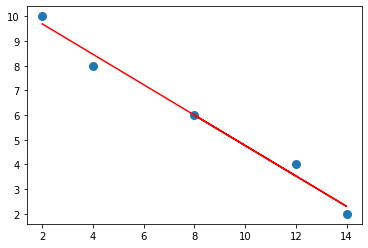

In [8]:
plt.scatter(X,Y, lw=3)
plt.plot(X, predictions, c='r')














f-Déterminer le coefficient de determination $R^2=1-\frac{\sum_{i=0}^{m}(y_{i}-h_\theta(x_{i}))^2}{\sum_{i=0}^{m}(y_{i}-\overline{y})^2}$ et le coefficient de coerrélation $R=\frac{cov(X,Y)}{\sigma(x)\sigma(y)}=\frac{\sum_{i=0}^{m}x_{i}y_{i}-m\overline{x}\overline{y}}{\sqrt{\sum_{i=0}^{m} (x_{i}^2-m\overline{x}^2 ) (\sum_{i=0}^{m}x_{i}^2-m\overline{x}^2)}}$

In [9]:
def corr_coef(X,Y):
    m = len(X)
    cov = np.sum(X*Y) - m*np.mean(X)*np.mean(Y)
    std_X = np.sqrt(np.sum(X**2) - m*np.mean(X)**2)
    std_Y = np.sqrt(np.sum(Y**2) - m*np.mean(Y)**2)
    return cov / (std_X*std_Y)

In [10]:
R = corr_coef(X,Y)
R

-0.9922778767136677

In [11]:
def determination_coef(Y,predictions):
    cost = np.sum((Y - predictions)**2)
    cost_y = np.sum((Y - np.mean(Y))**2)
    return 1 - cost/cost_y

In [12]:
pred = linear_model(X,theta)
R2 = determination_coef(Y,pred)
R2

0.9846153846153847

$R$ est proche de -1, donc on a une corrélation négative assez forte entre $X$ et $Y$.   ( si le prix augmente la quantité diminue).
Graphiquement, le nuage de points est sous forme d'une courbe décroissante linéaire ce qui confirme la liaison assez forte négativement.


## B-Utilisation de la méthode linregress

On peut utiliser le module librairie SciPy (Scientific Python) pour implémenter une régression linéaire. Le sous package stats propose la fonction linregress qui calcul une régression à partir d'un jeu de donnée d'entrainement

In [13]:
from scipy.stats import linregress

1- Ecrire un script qui calcule les valeur de $\theta_{0}$, $\theta_{1}$ en utilisant linregress et les données X et Y de la question précédente

In [14]:
theta

(10.923076923076923, -0.6153846153846154)

In [15]:
reg_lin = linregress(X,Y)
print('theta_0 :', reg_lin.intercept)
print('theta_1 :', reg_lin.slope)
# print('theta_0 :', reg_lin[1])
# print('theta_1 :', reg_lin[0])

theta_0 : 10.923076923076923
theta_1 : -0.6153846153846154


2- En utilisant la méthode linregress, calculer les valeur de $\theta_{0}$, $\theta_{1}$ pour les données du fichier "linear_regression_dataset.csv" (utiliser pondas pour afficher les données)

In [16]:
import pandas as pd

In [17]:
linear_data = pd.read_csv('linear_regression_dataset.csv', header=None)
linear_data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [18]:
x = linear_data[0].values
y = linear_data[1].values

regr = linregress(x,y)
data_theta = (regr[1],regr[0])
data_theta

(-3.8957808783118537, 1.193033644189594)

#### Prédiction d'une nouvelle observation
 Utilisons la fonction de prédiction pour trouver une estimation de  $h_\theta(x=22.5)$

In [19]:
linear_model(x,data_theta)

array([ 3.39377399,  2.6989512 ,  6.26719552,  4.45927234,  3.09515767,
        6.10530086,  5.02381586,  6.33818102,  3.84247394,  2.13452698,
        2.91727635, 13.00234766,  2.94507404,  6.13572322,  2.833764  ,
        2.52202431,  3.69835548,  2.22460102,  3.77494824,  4.53992141,
        3.48802365, 20.28701109,  2.65409313,  3.65146926,  2.74333205,
       18.70624151, 11.40845471,  9.17628876, 11.82363042, 22.59314512,
        2.37050903,  3.96559502,  7.13763287,  3.13333475,  5.90033768,
        5.56903223,  5.7629002 ,  2.79272364, 11.41799898,  3.68403908,
        2.55483273,  4.31527318, 10.07225703,  2.99243747,  5.43934948,
        4.56652606,  2.1531383 ,  3.02548451, 10.06271276,  2.71553436,
        5.09993141,  2.43648379,  4.96118159,  5.17497322,  3.65946258,
        3.69060076,  3.58955081,  2.83257096,  7.21160096,  7.38268198,
        6.63321825,  2.28329828, 21.49078204, 13.88996469, 18.72294398,
        4.71577457,  6.0005525 ,  8.3161115 ,  2.66518834, 20.37

# C-Méthode de la descente

 Pour minimiser le coût $$ J(\theta_{0},\theta_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} = \frac{1}{2m}\sum_{i=0}^{m}(\theta_{0}+ \theta_{1}x_{i}-y_{i})^{2} $$
On utilise la methode de la descente du gradient. Il faut donc calculer la dérivée de $J(\theta_{0},\theta_{1})$ par rapport à $\theta_{0}$ et par rapport à $\theta_{1}$ nous avons alors:
$$ \frac{\delta J(\theta_{0},\theta_{1})}{\delta \theta_{0}}=\frac{1}{m}\sum_{i=0}^{m}(\theta_{0}+ \theta_{1}x_{i}-y_{i}) $$

$$ \frac{\delta J(\theta_{0},\theta_{1})}{\delta \theta_{1}}=\frac{1}{m}\sum_{i=0}^{m}(\theta_{0}+ \theta_{1}x_{i}-y_{i})x_{i} $$
La mise à jour des coeficients sera comme suivant:
$$ \theta_{0}\leftarrow \theta_{0}- \alpha\frac{\delta J(\theta_{0},\theta_{1})}{\delta \theta_{0}}$$
$$ \theta_{1}\leftarrow \theta_{1}- \alpha\frac{\delta J(\theta_{0},\theta_{1})}{\delta \theta_{1}}$$

$\alpha$: learning rate

L'algorithme sous forme matricielle est le suivant

 <img src="18.png" style="with:140px;height:260px"/>

## 1-Datasets
1-Générer de données aléatoires avec une tendance linéaire avec make_regression: on a un dataset  qui contient 100 exemples, et une seule variable . Note: chaque fois que la cellule est executée, des données différentes sont générer. Utiliser np.random.seed(0) pour reproduire le meme Dataset a chaque fois.

In [69]:
from sklearn.datasets import make_regression

In [70]:
np.random.seed(0)
x,y = make_regression(100,1,noise=5)
print(x.shape)
print(y.shape)

(100, 1)
(100,)


Important: vérifier les dimensions de x et y. On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [71]:
y = y.reshape(-1,1)
print(y.shape)

(100, 1)


2-Créez la matrice X. 




In [72]:
X = np.concatenate((x, np.ones((x.shape))), axis=1)
X.shape

(100, 2)

3-Créez le vecteur $\theta$ (initialisé avec des coefficients aléatoires).

In [109]:
theta = np.random.random((2,1))
theta

array([[0.87355683],
       [0.49189223]])

# 2- Modele Linéaire de prédiction 
Implémenter le modèle de prédiction $ H_\theta=X.\theta$

In [74]:
def model(X,theta):
    return X.dot(theta)

In [75]:
pred_model = model(X,theta)
pred_model.shape

(100, 1)

In [4]:
x = np.array([[4,5],[2,1]])
y = np.array([[1,3],[8,1]])
x.dot(y)

array([[44, 17],
       [10,  7]])

# 3- Fonction Cout 
Ecrire un script qui définit la fonction cout $$ J(\theta)=\frac{1}{2m}\sum(X.\theta-Y)^{2}$$

In [76]:
def cost_func(X,Y,theta):
    m = len(X)
    mod = model(X,theta)
    return 1/2*m * np.sum((mod-Y)**2)

In [77]:
cost = cost_func(X,y,theta)
cost

9221366.330866506

# 4- Gradients et Descente de Gradient 
1-Ecrire un script qui définit la fonction du gradiant $$ \frac{\delta J(\theta)}{\delta \theta}=\frac{1}{m}X^T.(X.\theta-y)$$
 

In [78]:
def gradient(X,Y,theta):
    m = len(X)
    mod = model(X,theta)
    return 1/m * X.T@(mod - Y)

In [110]:
gradient(X,y, theta)

array([[-42.38289583],
       [ -1.5907594 ]])

2-Implementer la descente de gradient en utilisant de gradiant:
$$ \theta\leftarrow \theta- \alpha\frac{\delta J(\theta)}{\delta \theta}$$

In [90]:
def gradient_descent(X,Y,theta,learning_rate,n_iter):
    cost_hist = []
    for i in range(n_iter):
        theta = theta - learning_rate*gradient(X,Y,theta)
        cost_hist.append(cost_func(X,Y,theta))
        
    return theta, cost_hist

# 5-Calcul des parametres $\theta_1$ et  $\theta_0$
  1-On définit un nombre d'itérations de $1000$ , ainsi $\alpha=0.01$,calculer $\theta_1$ et  $\theta_0$
 
 

In [123]:
new_theta, cost_hist = gradient_descent(X,y,theta,0.01,1000)

print('theta_0 :',new_theta[1,0])
print('theta_1 :',new_theta[0,0])

theta_0 : -0.40599838096948965
theta_1 : 42.500670884677135


2-Créer d'un vecteur prédictions qui contient les prédictions de notre modele final

In [130]:
pred = model(X,new_theta)
pred[:10]


array([[-1.56872490e+01],
       [ 4.11018159e+01],
       [ 1.66937913e+01],
       [-3.49652609e+01],
       [-3.81374883e+01],
       [ 1.84584868e+01],
       [-4.19409639e+01],
       [ 1.77983935e+01],
       [ 8.44582792e+00],
       [-1.36471900e+01],
       [-2.21155594e+01],
       [ 4.98785070e+00],
       [-6.56973857e+01],
       [-1.74819577e+01],
       [ 2.73732304e+01],
       [ 4.96929242e+01],
       [-8.05292461e+00],
       [ 7.54946957e+01],
       [ 6.14016013e+01],
       [-2.95108867e+01],
       [ 4.11910226e+01],
       [ 8.01705635e+01],
       [-1.90244501e+01],
       [ 1.28995890e+01],
       [ 3.19386155e+01],
       [ 3.26378633e+01],
       [ 8.25032647e+01],
       [ 1.37753844e+01],
       [-1.51924981e+01],
       [ 6.47381465e+01],
       [-3.84639280e+01],
       [-2.50074975e+01],
       [-4.49702029e+01],
       [ 1.56661624e+01],
       [ 4.02595440e-02],
       [ 1.92625580e+01],
       [ 5.71595003e+00],
       [-1.75412891e+01],
       [ 1.8

3-Afficher les résultats de prédictions par rapport a notre Dataset

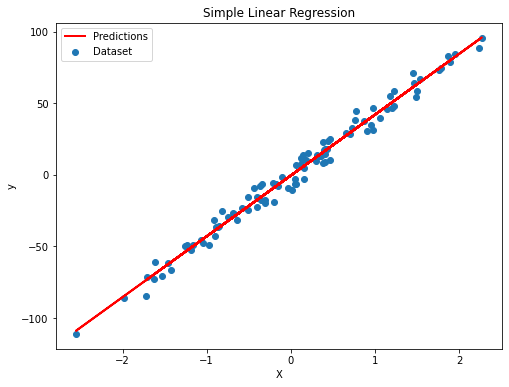

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(x,y, label="Dataset")
plt.plot(x,pred,c='r',lw=2, label="Predictions")
plt.title("Simple Linear Regression")
plt.xlabel("X"); plt.ylabel("y")
plt.legend()
plt.show()

 # 6. Courbes d'apprentissage
 vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

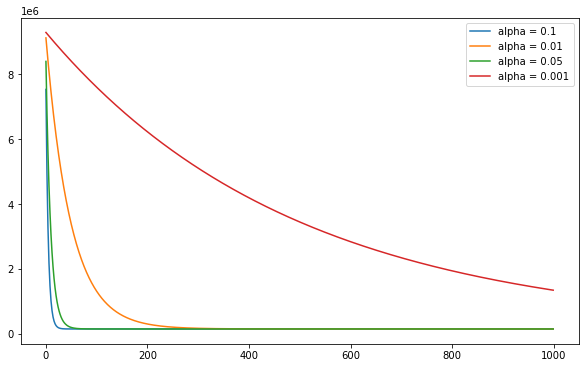

In [97]:
plt.figure(figsize=(10,6))
for alpha in [0.1,0.01,0.05,0.001]:
    plt.plot(range(1000), gradient_descent(X,y,theta,alpha,1000)[1], label=f"alpha = {alpha}")
plt.legend()

# 7-Evaluation finale
Utiliser le coefficient de détermination pour évaluer la réelle performance. 

In [103]:
determination_coef(y,pred)

0.9846839522701664

In [128]:
tt = gradient_descent(X,y,theta,0.1,1000)[0]
pred2 = model(X,tt)
determination_coef(y,pred2)

0.9846839545788689

In [129]:
ttt = gradient_descent(X,y,theta,0.02,1000)[0]
pred3 = model(X,ttt)
determination_coef(y,pred3)

0.9846839545788688

Plus le résultat est proche de 1, meilleur est votre modele

## Regression multiple

In [115]:
np.random.seed(0)
xm,ym = make_regression(100,5,noise=5)
ym = ym.reshape(100,1)
print('X :',xm.shape)
print('y ',ym.shape)

Xm = np.concatenate((xm, np.ones((xm.shape))), axis=1)
print('new X :',Xm.shape)

theta_ = np.random.random((5,1))
print("theta :", theta_.shape)

theta_n, cost_hist_ = gradient_descent(Xm,ym,theta_,0.01,1000)


X : (100, 5)
y  (100, 1)
new X : (100, 10)
theta : (5, 1)


ValueError: x and y must be the same size

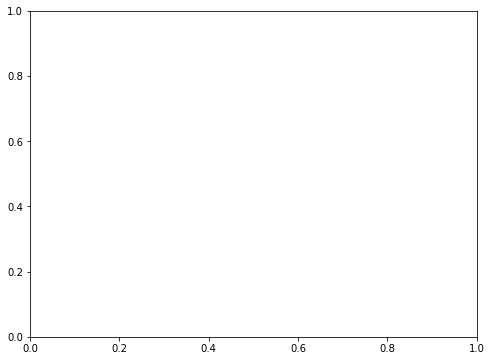